# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key as wapk

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:


base_url = 'http://api.openweathermap.org/data/2.5/weather?'


city_list = []


print('Pulling data')
print('-------------------')

record_count = 1
set_count = 1

query_url = base_url + 'APPID=' + wapk + '&units=imperial'

for i, city in enumerate(cities):
    city_url = query_url + '&q=' + city.replace(' ', '+')
    print(f'Processing Record {record_count} of Set {set_count} - {city}')
    record_count +=1

    try: 
        response = requests.get(city_url).json()

        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]       
            
           
        city_list.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    except:
        print('city not found')
        
        pass


print('Pulling dta complete')

Pulling data
-------------------
Processing Record 1 of Set 1 - gravdal
Processing Record 2 of Set 1 - tingrela
city not found
Processing Record 3 of Set 1 - betare oya
Processing Record 4 of Set 1 - mumford
Processing Record 5 of Set 1 - lagoa
Processing Record 6 of Set 1 - tabiauea
city not found
Processing Record 7 of Set 1 - cape town
Processing Record 8 of Set 1 - bosaso
Processing Record 9 of Set 1 - mabaruma
Processing Record 10 of Set 1 - nikolskoye
Processing Record 11 of Set 1 - kapaa
Processing Record 12 of Set 1 - tahta
Processing Record 13 of Set 1 - bluff
Processing Record 14 of Set 1 - ballina
Processing Record 15 of Set 1 - albany
Processing Record 16 of Set 1 - warqla
city not found
Processing Record 17 of Set 1 - saint-philippe
Processing Record 18 of Set 1 - ushuaia
Processing Record 19 of Set 1 - upernavik
Processing Record 20 of Set 1 - avarua
Processing Record 21 of Set 1 - severo-kurilsk
Processing Record 22 of Set 1 - luderitz
Processing Record 23 of Set 1 - vil

Processing Record 190 of Set 1 - te anau
Processing Record 191 of Set 1 - sinnamary
Processing Record 192 of Set 1 - ratnagiri
Processing Record 193 of Set 1 - tuktoyaktuk
Processing Record 194 of Set 1 - zarichne
Processing Record 195 of Set 1 - kloulklubed
Processing Record 196 of Set 1 - raga
Processing Record 197 of Set 1 - marzuq
Processing Record 198 of Set 1 - sainte-marie
Processing Record 199 of Set 1 - egvekinot
Processing Record 200 of Set 1 - meyungs
city not found
Processing Record 201 of Set 1 - novyy urengoy
Processing Record 202 of Set 1 - norman wells
Processing Record 203 of Set 1 - iqaluit
Processing Record 204 of Set 1 - geraldton
Processing Record 205 of Set 1 - koslan
Processing Record 206 of Set 1 - zhezkazgan
Processing Record 207 of Set 1 - chabahar
Processing Record 208 of Set 1 - saint anthony
Processing Record 209 of Set 1 - de aar
Processing Record 210 of Set 1 - adrar
Processing Record 211 of Set 1 - thilogne
city not found
Processing Record 212 of Set 1 -

Processing Record 381 of Set 1 - grand river south east
city not found
Processing Record 382 of Set 1 - benguela
Processing Record 383 of Set 1 - vallenar
Processing Record 384 of Set 1 - saint george
Processing Record 385 of Set 1 - kostomuksha
Processing Record 386 of Set 1 - athens
Processing Record 387 of Set 1 - saldanha
Processing Record 388 of Set 1 - santa rosa
Processing Record 389 of Set 1 - okha
Processing Record 390 of Set 1 - moroto
Processing Record 391 of Set 1 - laguna
Processing Record 392 of Set 1 - trojan
Processing Record 393 of Set 1 - tumaco
Processing Record 394 of Set 1 - avera
Processing Record 395 of Set 1 - norsup
Processing Record 396 of Set 1 - envira
Processing Record 397 of Set 1 - shilovo
Processing Record 398 of Set 1 - khatra
Processing Record 399 of Set 1 - ondangwa
Processing Record 400 of Set 1 - huilong
Processing Record 401 of Set 1 - portland
Processing Record 402 of Set 1 - zhigansk
Processing Record 403 of Set 1 - matamoros
Processing Record 40

Processing Record 571 of Set 1 - caceres
Processing Record 572 of Set 1 - faanui
Processing Record 573 of Set 1 - sestri levante
Processing Record 574 of Set 1 - bandarbeyla
Processing Record 575 of Set 1 - abu kamal
Processing Record 576 of Set 1 - akyab
Processing Record 577 of Set 1 - den helder
Processing Record 578 of Set 1 - general pico
Processing Record 579 of Set 1 - adre
Processing Record 580 of Set 1 - salinopolis
Processing Record 581 of Set 1 - labutta
city not found
Processing Record 582 of Set 1 - florianopolis
Processing Record 583 of Set 1 - nijar
Pulling dta complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_list = pd.DataFrame(city_list).sort_index(axis=1)
city_list.to_csv('cities.csv')
city_list

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gravdal,75,NO,65,68.1214,13.5031,39.09,18.41
1,Betare Oya,25,CM,16,5.6000,14.0833,92.14,7.11
2,Mumford,100,GH,57,5.2618,-0.7590,83.64,9.26
3,Lagoa,100,PT,87,39.0500,-27.9833,59.94,26.04
4,Cape Town,0,ZA,51,-33.9258,18.4232,78.91,8.05
...,...,...,...,...,...,...,...,...
530,General Pico,30,AR,15,-35.6566,-63.7568,95.76,2.51
531,Adre,1,TD,14,13.4667,22.2000,77.40,12.62
532,Salinopolis,42,BR,68,-0.6136,-47.3561,84.11,7.83
533,Florianopolis,20,BR,69,-27.6146,-48.5012,79.56,12.66


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
max_hum=city_list["Humidity"].max
max_hum

<bound method NDFrame._add_numeric_operations.<locals>.max of 0      65
1      16
2      57
3      87
4      51
       ..
530    15
531    14
532    68
533    69
534    35
Name: Humidity, Length: 535, dtype: int64>

In [6]:
#  Get the indices of cities that have humidity over 100%.
print("No city with Humidity > 100")

No city with Humidity > 100


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

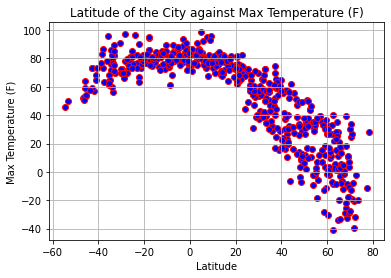

In [8]:
x_values = city_list['Lat']
y_values = city_list['Max Temp']

plt.scatter(x_values, y_values, edgecolors = 'red', color = 'blue')
plt.grid()
plt.title('Latitude of the City against Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')


plt.savefig('CityLatitude_against_MaxTemperature.png')

plt.show()

## Latitude vs. Humidity Plot

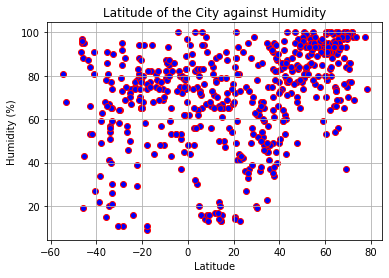

In [9]:
plt.scatter(city_list['Lat'], city_list['Humidity'], edgecolors ='red', color = 'blue')
plt.title('Latitude of the City against Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


plt.savefig('CityLatitude_against_Humidity.png')

plt.show()

## Latitude vs. Cloudiness Plot

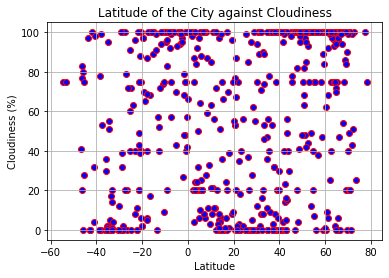

In [10]:
plt.scatter(city_list['Lat'], city_list['Cloudiness'], edgecolors ='red', color = 'blue')
plt.title('Latitude of the City against Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()


plt.savefig('CityLatitude_against_Cloudiness.png')

plt.show()

## Latitude vs. Wind Speed Plot

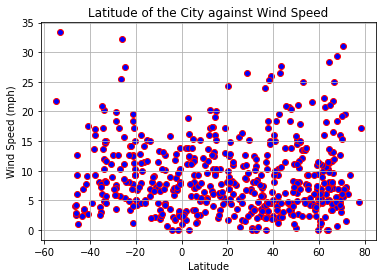

In [11]:
plt.scatter(city_list['Lat'], city_list['Wind Speed'], edgecolors ='red', color = 'blue')
plt.title('Latitude of the City against Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the Figure
plt.savefig('CityLatitudeagainst_WindSpeed.png')

plt.show()

## Linear Regression

In [12]:
north = city_list.loc[city_list['Lat'] >= 0]
south = city_list.loc[city_list['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

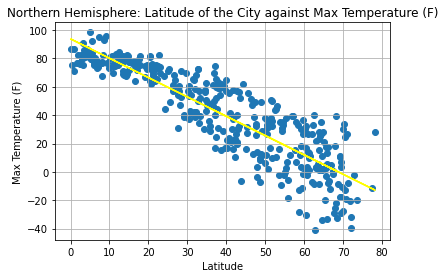

<Figure size 432x288 with 0 Axes>

In [13]:
xval = north['Lat']
yval = north['Max Temp']

linear_regression = linregress(xval,yval)
slope, intercept, rvalue, pvalue, stderr = linregress(xval, yval) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = xval*slope + intercept

plt.scatter(xval, yval)
plt.plot(xval, regress, color='yellow')
plt.title('Northern Hemisphere: Latitude of the City against Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(equation, (12,264))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_against_Max_Temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

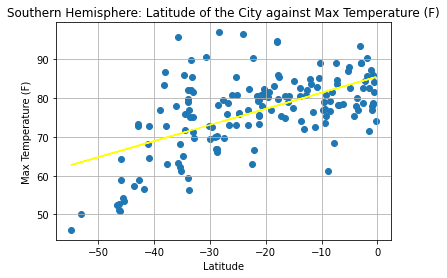

<Figure size 432x288 with 0 Axes>

In [14]:
linear_regression = linregress(south['Lat'], south['Max Temp'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Max Temp']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Max Temp'])
plt.plot(south['Lat'], regress, color='yellow')
plt.title('Southern Hemisphere: Latitude of the City against Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(equation, (-47,307))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_against_Max_Temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

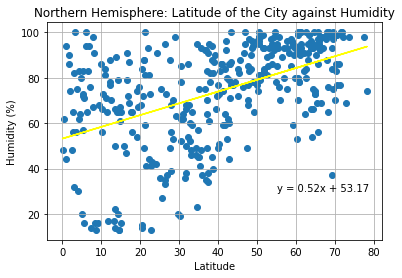

<Figure size 432x288 with 0 Axes>

In [15]:
linear_regression = linregress(north['Lat'], north['Humidity'])
slope, intercept, rvalue, pvalue, stderr = linregress(north['Lat'], north['Humidity']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = north['Lat']*slope + intercept

plt.scatter(north['Lat'], north['Humidity'])
plt.plot(north['Lat'], regress, color='yellow')
plt.title('Northern Hemisphere: Latitude of the City against Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(equation, (55,30))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_against_Humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

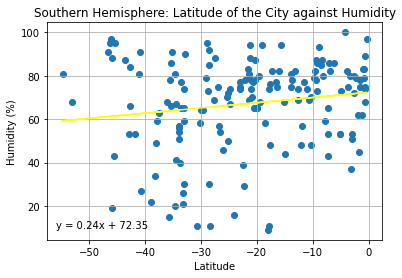

<Figure size 432x288 with 0 Axes>

In [16]:
linear_regression = linregress(south['Lat'], south['Humidity'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Humidity']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Humidity'])
plt.plot(south['Lat'], regress, color='yellow')
plt.title('Southern Hemisphere: Latitude of the City against Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(equation, (-56,10))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_against_Humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

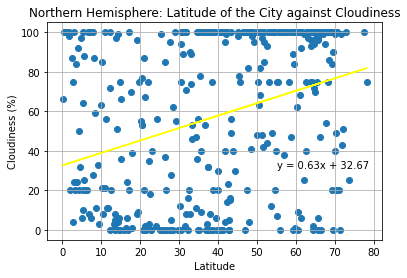

<Figure size 432x288 with 0 Axes>

In [17]:
linear_regression = linregress(north['Lat'], north['Cloudiness'])
slope, intercept, rvalue, pvalue, stderr = linregress(north['Lat'], north['Cloudiness']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = north['Lat']*slope + intercept

plt.scatter(north['Lat'], north['Cloudiness'])
plt.plot(north['Lat'], regress, color='yellow')
plt.title('Northern Hemisphere: Latitude of the City against Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(equation, (55,31))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_against_Cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

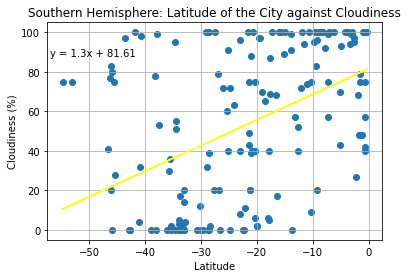

<Figure size 432x288 with 0 Axes>

In [18]:
linear_regression = linregress(south['Lat'], south['Cloudiness'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Cloudiness']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Cloudiness'])
plt.plot(south['Lat'], regress, color='yellow')
plt.title('Southern Hemisphere: Latitude of the City against Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(equation, (-57,88))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_against_Cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

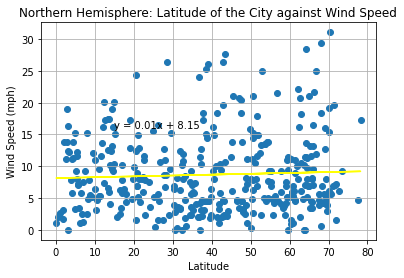

<Figure size 432x288 with 0 Axes>

In [19]:
linear_regression = linregress(north['Lat'], north['Wind Speed'])
slope, intercept, rvalue, pvalue, stderr = linregress(north['Lat'], north['Wind Speed']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = north['Lat']*slope + intercept

plt.scatter(north['Lat'], north['Wind Speed'])
plt.plot(north['Lat'], regress, color='yellow')
plt.title('Northern Hemisphere: Latitude of the City against Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(equation, (15,16))
plt.grid()
plt.show()
plt.savefig('Northern_Hemi_CityLatitude_against_Wind_Speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

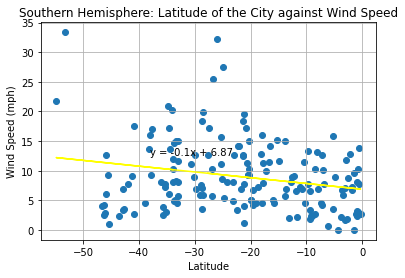

<Figure size 432x288 with 0 Axes>

In [20]:
linear_regression = linregress(south['Lat'], south['Wind Speed'])
slope, intercept, rvalue, pvalue, stderr = linregress(south['Lat'], south['Wind Speed']) 
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = south['Lat']*slope + intercept

plt.scatter(south['Lat'], south['Wind Speed'])
plt.plot(south['Lat'], regress, color='yellow')
plt.title('Southern Hemisphere: Latitude of the City against Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(equation, (-38,12.7))
plt.grid()
plt.show()
plt.savefig('Southern_Hemi_CityLatitude_against_Wind_Speed.png')